

**Task 3**

Loading the Dataset

In [1]:

import sklearn.datasets as datasets
import pandas as pd

iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Function to get the mean error of model and grid search to get optimum parameters

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
def error(y_test,y_pred): 
  print('Mean Absolute Error:', 
        metrics.mean_absolute_error(y_test, y_pred))
  print('Accuracy score:',metrics.accuracy_score(y_test,y_pred))
def get_optimum_paramenters(model,parameters,X_train,y_train):
  gridcv=GridSearchCV(estimator=model,param_grid=parameters, cv = 2, n_jobs=-1)
  gridcv.fit(X_train,y_train)
  return gridcv


### Now let us define the Decision Tree Algorithm
1.Decession Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, 
                            test_size=0.3, random_state=30)
max_depth=[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]

min_samples_split=[1,2,3,4,5]

dtree=DecisionTreeClassifier()
print("Before using grid Search")
dtree.fit(X_train,y_train)
out=dtree.predict(X_test)
error(y_test,out)
print("After using grid Search")
tree_param = {'criterion':['gini','entropy'],'max_depth':max_depth,'min_samples_split':min_samples_split}
res=get_optimum_paramenters(dtree,tree_param,X_train,y_train)
print(res.best_estimator_)
y_pred=res.predict(X_test)
error(y_test,y_pred)



print('Decision Tree Classifer Created')

Before using grid Search
Mean Absolute Error: 0.022222222222222223
Accuracy score: 0.9777777777777777
After using grid Search
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Mean Absolute Error: 0.044444444444444446
Accuracy score: 0.9555555555555556
Decision Tree Classifer Created


2.Random forrest Classifier

In [4]:
estimators=[50,100,150,200]
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
error(y_test,y_pred)
param = {'criterion':['gini','entropy'],'n_estimators':estimators}
res=get_optimum_paramenters(rf,param,X_train,y_train)
print(res.best_estimator_)
y_pred=res.predict(X_test)
error(y_test,y_pred)
single_rf=rf.estimators_[10]


Mean Absolute Error: 0.06666666666666667
Accuracy score: 0.9333333333333333
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Mean Absolute Error: 0.044444444444444446
Accuracy score: 0.9555555555555556


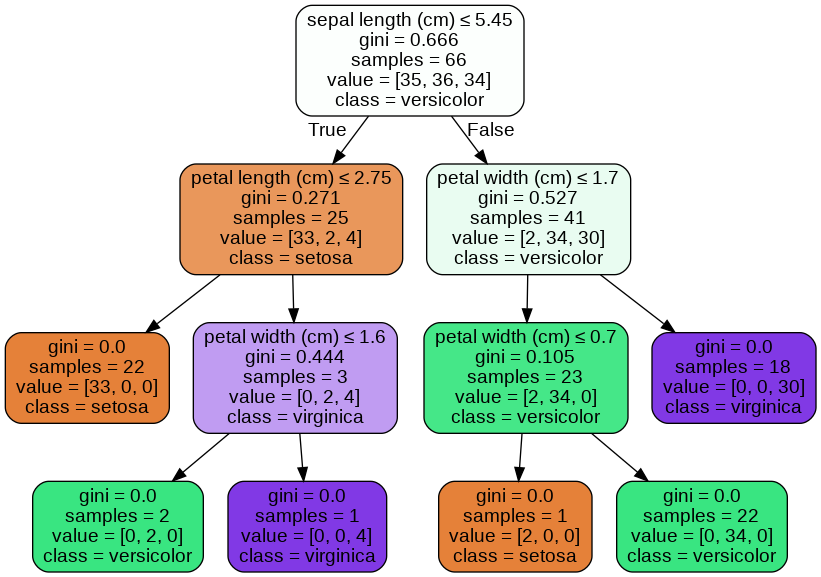

In [7]:
graph=display_tree(single_rf)
Image(graph.create_png())

3.Adabosst Classifier to enhance the Decession tree model

Mean Absolute Error: 0.044444444444444446
Accuracy score: 0.9555555555555556
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                         

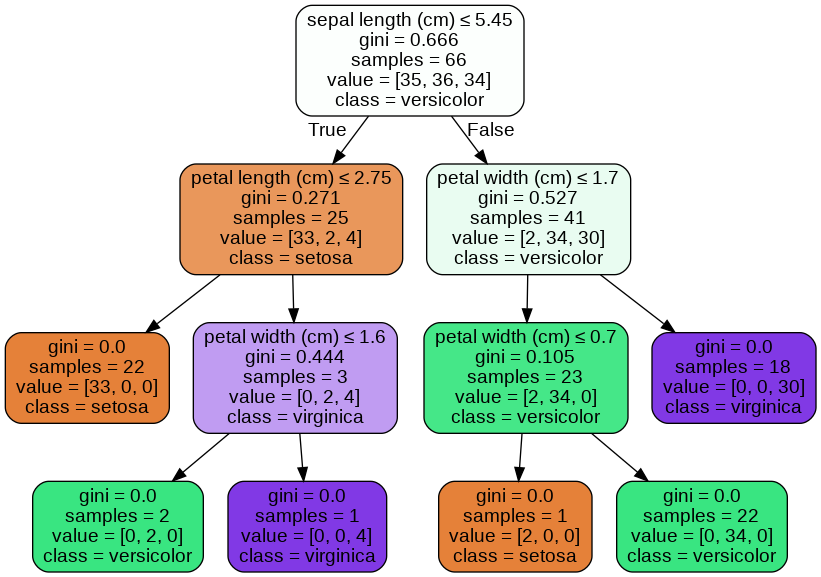

In [8]:
ab=AdaBoostClassifier(dtree)
ab.fit(X_train,y_train)
y_pred=ab.predict(X_test)
error(y_test,y_pred)
param = {'learning_rate':[0.01,0.1,1,0.001],'n_estimators':estimators}
res=get_optimum_paramenters(ab,param,X_train,y_train)
print(res.best_estimator_)
y_pred=res.predict(X_test)
error(y_test,y_pred)
single=ab.estimators_[0]
graph=display_tree(single_rf)
Image(graph.create_png())

### Let us visualize the Decision Tree to understand it better.



In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


Display_tree() function to print the Tree Structure

In [6]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def display_tree(model):
    # Visualize the graph
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,class_names = iris.target_names,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph  
    

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
